In [122]:
import gdelt
import pandas as pd
import numpy as  np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer,mean_squared_error,r2_score

In [45]:
gd = gdelt.gdelt()

df=gd.Search(['2017 10 01','2018 02 18'],table='events')

/home/chiru/anaconda2/lib/python2.7/site-packages/gdelt/parallel.py:69: UserWarning: GDELT does not have a url for date time 20171001234500
  warnings.warn(message)
/home/chiru/anaconda2/lib/python2.7/site-packages/gdelt/parallel.py:105: UserWarning: GDELT did not return data for date time 20171001234500
  warnings.warn(message)
/home/chiru/anaconda2/lib/python2.7/site-packages/gdelt/parallel.py:69: UserWarning: GDELT does not have a url for date time 20171030234500
  warnings.warn(message)
/home/chiru/anaconda2/lib/python2.7/site-packages/gdelt/parallel.py:105: UserWarning: GDELT did not return data for date time 20171030234500
  warnings.warn(message)
/home/chiru/anaconda2/lib/python2.7/site-packages/gdelt/parallel.py:69: UserWarning: GDELT does not have a url for date time 20171130234500
  warnings.warn(message)
/home/chiru/anaconda2/lib/python2.7/site-packages/gdelt/parallel.py:105: UserWarning: GDELT did not return data for date time 20171130234500
  warnings.warn(message)
/home/c

In [46]:
df=df.dropna(subset=['ActionGeo_CountryCode'])
df.isnull().any()

GLOBALEVENTID            False
SQLDATE                  False
MonthYear                False
Year                     False
FractionDate             False
Actor1Code                True
Actor1Name                True
Actor1CountryCode         True
Actor1KnownGroupCode      True
Actor1EthnicCode          True
Actor1Religion1Code       True
Actor1Religion2Code       True
Actor1Type1Code           True
Actor1Type2Code           True
Actor1Type3Code           True
Actor2Code                True
Actor2Name                True
Actor2CountryCode         True
Actor2KnownGroupCode      True
Actor2EthnicCode          True
Actor2Religion1Code       True
Actor2Religion2Code       True
Actor2Type1Code           True
Actor2Type2Code           True
Actor2Type3Code           True
IsRootEvent              False
EventCode                False
CAMEOCodeDescription     False
EventBaseCode            False
EventRootCode            False
                         ...  
NumMentions              False
NumSourc

In [133]:
X=df[['SQLDATE','EventRootCode','ActionGeo_CountryCode','AvgTone','QuadClass','GoldsteinScale','NumMentions']]
X.set_index('SQLDATE').head()

,EventRootCode,ActionGeo_CountryCode,AvgTone,QuadClass,GoldsteinScale,NumMentions
SQLDATE,,,,,,
20161008,04,12,1.027397,1,2.8,5
20161008,03,12,-0.500000,1,4.0,1
20161008,03,218,0.178891,1,4.0,1
20161008,19,228,-10.559006,4,-10.0,5
20161008,04,12,1.027397,1,1.9,4


In [48]:
df_US=X[X['ActionGeo_CountryCode']=='US']
df_IN=X[X['ActionGeo_CountryCode']=='IN']

In [49]:
df_14=df_US[df_US.EventRootCode =='14']
df_19=df_US[df_US.EventRootCode =='19']

In [117]:
x=df_14.iloc[:,:-1]
y=df_14.NumMentions
lablel_encoder = LabelEncoder()
x['ActionGeo_CountryCode']=lablel_encoder.fit_transform(x['ActionGeo_CountryCode'])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=9)

In [119]:
X_train=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
X_test=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
X_train.shape,X_test.shape

((387, 1, 6), (130, 1, 6))

Train on 387 samples, validate on 130 samples
Epoch 1/100
 - 1s - loss: 3.6308 - val_loss: 3.6444
Epoch 2/100
 - 0s - loss: 3.5673 - val_loss: 3.5910
Epoch 3/100
 - 0s - loss: 3.5158 - val_loss: 3.5404
Epoch 4/100
 - 0s - loss: 3.4655 - val_loss: 3.4902
Epoch 5/100
 - 0s - loss: 3.4153 - val_loss: 3.4397
Epoch 6/100
 - 0s - loss: 3.3649 - val_loss: 3.3891
Epoch 7/100
 - 0s - loss: 3.3143 - val_loss: 3.3381
Epoch 8/100
 - 0s - loss: 3.2634 - val_loss: 3.2871
Epoch 9/100
 - 0s - loss: 3.2123 - val_loss: 3.2357
Epoch 10/100
 - 0s - loss: 3.1610 - val_loss: 3.1841
Epoch 11/100
 - 0s - loss: 3.1095 - val_loss: 3.1324
Epoch 12/100
 - 0s - loss: 3.0579 - val_loss: 3.0806
Epoch 13/100
 - 0s - loss: 3.0061 - val_loss: 3.0286
Epoch 14/100
 - 0s - loss: 2.9542 - val_loss: 2.9765
Epoch 15/100
 - 0s - loss: 2.9022 - val_loss: 2.9243
Epoch 16/100
 - 0s - loss: 2.8501 - val_loss: 2.8720
Epoch 17/100
 - 0s - loss: 2.8113 - val_loss: 2.8578
Epoch 18/100
 - 0s - loss: 2.8027 - val_loss: 2.8499
Epoch 19/

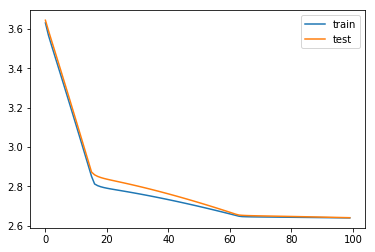

In [120]:
#Training the model based on data to predict numMentions of individual eventCode in country.
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(1, 6)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [147]:
y_pred = model.predict(X_test)

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 3.604
